# Cifar10

Passons à autre chose que du Cats & Dogs. Nous allons essayer de créer un CNN qui va classer non pas 2 mais 10 labels d'images différents. Nous tirons les images du dataset nommé [Cifar10](http://www.cs.utoronto.ca/~kriz/cifar.html) 

* Importez :
  * Tensorflow 2.0
  * Numpy 
  * Matplotlib.pyplot 

In [0]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 421.8MB 44kB/s 
     |████████████████████████████████| 3.8MB 25.3MB/s 
     |████████████████████████████████| 450kB 65.3MB/s 
     |████████████████████████████████| 81kB 12.2MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstal

'2.1.0'

* En utilisant [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) importez cifar10 et stockez les données dans `X_train, y_train, X_test, y_test`

170500096/170498071 [==============================] - 4s 0us/step


* Visualisez une image aléatoire de votre dataset 

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[1]')

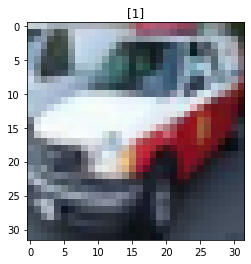

* Visualisez une image aléatoire de chacun de vos labels dans votre dataset 

index for each image :[0 1 2 3 4 5 6 7 8 9]


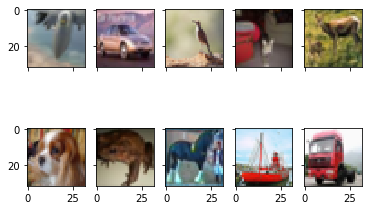

* Stockez vos images et labels d'entrainements dans un `tf.data.Dataset`
* Faites de mêmes avec les images et labels de validation

In [0]:
ds_train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
ds_valid = tf.data.Dataset.from_tensor_slices((X_test, y_test))

* Mélangez votre dataset via `.shuffle()` et créez des batchs de 16 images via `.batch()`

In [0]:
ds_train = ds_train.shuffle(50000).batch(16)
ds_valid = ds_valid.shuffle(50000).batch(16)

* Regardez un exemple 

In [0]:
for image in ds_train.take(1):
  print(image)

(<tf.Tensor: shape=(16, 32, 32, 3), dtype=uint8, numpy=
array([[[[ 77,  82,  87],
         [128, 127, 135],
         [113, 105, 113],
         ...,
         [104, 104,  98],
         [ 99, 102,  97],
         [111, 106, 104]],

        [[ 74,  78,  82],
         [ 88,  89,  97],
         [ 71,  70,  76],
         ...,
         [110, 109, 111],
         [145, 138, 137],
         [162, 146, 138]],

        [[ 93, 100, 106],
         [ 80,  84,  86],
         [ 70,  67,  68],
         ...,
         [140, 128, 127],
         [156, 146, 147],
         [140, 126, 120]],

        ...,

        [[127, 115, 115],
         [118, 105, 104],
         [122, 111, 107],
         ...,
         [ 84,  95, 112],
         [ 82,  94, 116],
         [ 82,  88, 103]],

        [[130, 116, 115],
         [118, 104, 103],
         [110,  98,  97],
         ...,
         [ 85,  96, 111],
         [ 76,  86, 100],
         [ 76,  80,  92]],

        [[121, 109, 109],
         [112, 100,  99],
         [104,  92

* Créez un modèle CNN dans lequel vous mettrez des couches convolutionnelles 2D et des couches MaxPool2D 

* Créez une _Learning Rate Schedule_. Vous pouvez choisir de le faire avec [_ExponentialDecay_](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) ou [d'autres méthodes](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules)

* Créez un compileur dans lequel vous choisirez : 
  * Votre optimiseur 
  * Votre loss 
  * Vos métrics 

* Faites tourner votre modèle sur 10 epochs 

In [0]:
model.fit(ds_train, epochs=10)

Train for 3125 steps
Epoch 1/10
3125/3125 [==============================] - 11s 4ms/step - loss: 0.7288 - sparse_categorical_accuracy: 0.7437
Epoch 2/10
3125/3125 [==============================] - 11s 4ms/step - loss: 0.6972 - sparse_categorical_accuracy: 0.7550
Epoch 3/10
3125/3125 [==============================] - 11s 4ms/step - loss: 0.6596 - sparse_categorical_accuracy: 0.7676
Epoch 4/10
3125/3125 [==============================] - 11s 3ms/step - loss: 0.6284 - sparse_categorical_accuracy: 0.7795
Epoch 5/10
3125/3125 [==============================] - 11s 3ms/step - loss: 0.5874 - sparse_categorical_accuracy: 0.7941
Epoch 6/10
3125/3125 [==============================] - 11s 3ms/step - loss: 0.5601 - sparse_categorical_accuracy: 0.8017
Epoch 7/10
3125/3125 [==============================] - 11s 3ms/step - loss: 0.5319 - sparse_categorical_accuracy: 0.8138
Epoch 8/10
3125/3125 [==============================] - 11s 3ms/step - loss: 0.5047 - sparse_categorical_accuracy: 0.8246
Epo

* Evaluez votre modèle

625/625 [==============================] - 1s 2ms/step - loss: 1.2749 - sparse_categorical_accuracy: 0.6650


[1.2749442307233811, 0.665]

* Tentez d'entrainer votre modèle à nouveau. Cette fois cependant : 
  * Ajoutez l'argument *validation_data = ds_valid*  
  * Profitez en pour enregistrer votre entrainement dans une variable _history_
  
* Que pouvez vous conclure sur votre modèle ?

Train for 3125 steps, validate for 625 steps
Epoch 1/15
3125/3125 [==============================] - 12s 4ms/step - loss: 0.4283 - sparse_categorical_accuracy: 0.8507 - val_loss: 1.3216 - val_sparse_categorical_accuracy: 0.6616
Epoch 2/15
3125/3125 [==============================] - 12s 4ms/step - loss: 0.4094 - sparse_categorical_accuracy: 0.8591 - val_loss: 1.2930 - val_sparse_categorical_accuracy: 0.6666
Epoch 3/15
3125/3125 [==============================] - 12s 4ms/step - loss: 0.3876 - sparse_categorical_accuracy: 0.8653 - val_loss: 1.3848 - val_sparse_categorical_accuracy: 0.6629
Epoch 4/15
3125/3125 [==============================] - 12s 4ms/step - loss: 0.3643 - sparse_categorical_accuracy: 0.8741 - val_loss: 1.4138 - val_sparse_categorical_accuracy: 0.6671
Epoch 5/15
3125/3125 [==============================] - 12s 4ms/step - loss: 0.3565 - sparse_categorical_accuracy: 0.8768 - val_loss: 1.4635 - val_sparse_categorical_accuracy: 0.6565
Epoch 6/15
3125/3125 [==================

* Regardez ce qu'il y a dans `history.history`

{'loss': [0.42831908326894047,
  0.4094136567226052,
  0.3875706521087885,
  0.3642813870686293,
  0.35647907069832085,
  0.33280399138614536,
  0.3243628663368523,
  0.3053485202844441,
  0.2966909668931365,
  0.28771384566694497,
  0.2705050406068564,
  0.2650731646630168,
  0.25143368609957395,
  0.24162461894646287,
  0.23637662802772597],
 'sparse_categorical_accuracy': [0.85068,
  0.85912,
  0.86534,
  0.8741,
  0.87678,
  0.88574,
  0.88968,
  0.89378,
  0.8988,
  0.90294,
  0.90942,
  0.91002,
  0.9164,
  0.91992,
  0.92272],
 'val_loss': [1.3216309416294099,
  1.2930277338027953,
  1.3847651427507401,
  1.4138242642641068,
  1.463464285182953,
  1.4788090208768845,
  1.4669122014760971,
  1.5869977488040925,
  1.577447029709816,
  1.6348172973871231,
  1.6724575570464135,
  1.7727583968877791,
  1.7532538117647172,
  1.8257135567873717,
  1.855525201356411],
 'val_sparse_categorical_accuracy': [0.6616,
  0.6666,
  0.6629,
  0.6671,
  0.6565,
  0.6668,
  0.6676,
  0.6585,
  0.6

* Regardez maintenant un graphique de l'évolution de votre *loss*  à mesure que les epochs avancent  

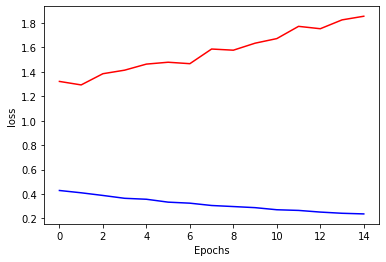

* Faites de même avec votre Accuracy 

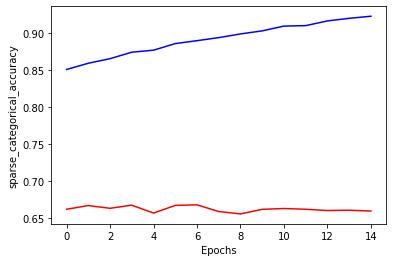

* Un moyen de gérer l'overfitting est de faire ce qu'on appelle de la _Data Augementation_. Le principe est de prendre les images que nous avons dans le jeu de données et de les répéter avec quelques changement mineurs comme : 
  * Changer la couleur, la luminosité 
  * Retourner l'image
  * Couper l'image 

Cette technique permet de créer de nouvelles images sur lesquelles le modèle peut s'entrainer et donc mieux performer ! Tentons de voir ce que cela pourrait donner sur notre jeu de données. 

* Commencez par utiliser la fonction [`.unbatch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#unbatch) sur votre jeu de données d'entrainement et de validation. Nous allons changer la taille des batchs plus tard 

* Vérifiez que vous ayez bien des tenseurs de taille (32, 32, 3) en regardant un exemple dans votre dataset 

tf.Tensor([32 32  3], shape=(3,), dtype=int32)


* En utilisant la fonction [`repeat()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#repeat) copiez votre dataset 10 fois 

* On va procéder maintenant à une phase de Data Augmentation. Créez une fonction `data_aug(image, label)` qui prendra comme argument une image et un label. A l'intérieur de cette fonction, tentez d'utiliser :
  * tf.image.random_flip_left_right
  * tf.image.random_contrast
  * tf.image.random_crop
  * Divisez le tenseur par 255

  * Vous pouvez tentez d'autres choses si vous le souhaitez

* Utilisez la fonction `.map()` pour appliquer votre fonction sur votre tf dataset

* Créez une fonction pour votre jeu de données de validation où vous diviserez simplement les tenseurs par 255. Nous ne voulons pas appliquer de data augmentation sur notre jeu de données de validation 

* Appliquez la fonction sur votre jeu de données de validation 

* Créez des batchs de 32 images pour votre jeu de données de validation et d'entrainement 

* Réappliquez le même modèle sur votre nouveau jeu de données
  * N'oubliez pas de stocker votre entrainement dans une variable `history`

Epoch 1/15
15625/15625 [==============================] - 132s 8ms/step - loss: 1.2294 - sparse_categorical_accuracy: 0.5633 - val_loss: 0.9418 - val_sparse_categorical_accuracy: 0.6739
Epoch 2/15
15625/15625 [==============================] - 93s 6ms/step - loss: 0.9179 - sparse_categorical_accuracy: 0.6783 - val_loss: 0.8656 - val_sparse_categorical_accuracy: 0.6983
Epoch 3/15
15625/15625 [==============================] - 95s 6ms/step - loss: 0.8044 - sparse_categorical_accuracy: 0.7181 - val_loss: 0.8307 - val_sparse_categorical_accuracy: 0.7099
Epoch 4/15
15625/15625 [==============================] - 91s 6ms/step - loss: 0.7311 - sparse_categorical_accuracy: 0.7435 - val_loss: 0.8226 - val_sparse_categorical_accuracy: 0.7202
Epoch 5/15
15625/15625 [==============================] - 98s 6ms/step - loss: 0.6799 - sparse_categorical_accuracy: 0.7616 - val_loss: 0.8272 - val_sparse_categorical_accuracy: 0.7240
Epoch 6/15
15625/15625 [==============================] - 100s 6ms/step - 

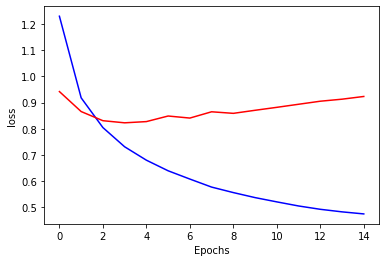

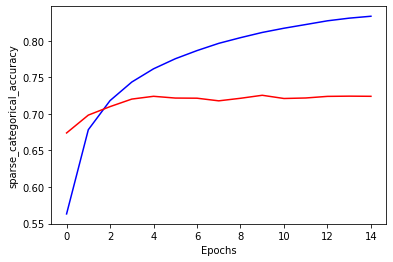

* Tentons une nouvelle technique de réguliarisation : le Dropout. Ajoutez quelques couches de dropout à 20% dans votre modèle 

* Ré-entrainez votre modèle sur 15 à 30 epochs 

Epoch 1/15
15625/15625 [==============================] - 133s 9ms/step - loss: 1.2858 - sparse_categorical_accuracy: 0.5416 - val_loss: 0.9311 - val_sparse_categorical_accuracy: 0.6805
Epoch 2/15
15625/15625 [==============================] - 101s 6ms/step - loss: 1.0138 - sparse_categorical_accuracy: 0.6430 - val_loss: 0.8494 - val_sparse_categorical_accuracy: 0.7090
Epoch 3/15
15625/15625 [==============================] - 100s 6ms/step - loss: 0.9335 - sparse_categorical_accuracy: 0.6712 - val_loss: 0.8079 - val_sparse_categorical_accuracy: 0.7241
Epoch 4/15
15625/15625 [==============================] - 98s 6ms/step - loss: 0.8848 - sparse_categorical_accuracy: 0.6881 - val_loss: 0.7932 - val_sparse_categorical_accuracy: 0.7290
Epoch 5/15
15625/15625 [==============================] - 99s 6ms/step - loss: 0.8528 - sparse_categorical_accuracy: 0.7000 - val_loss: 0.7636 - val_sparse_categorical_accuracy: 0.7388
Epoch 6/15
15625/15625 [==============================] - 99s 6ms/step -

* Faites les visualisations de de loss et d'accuracy 

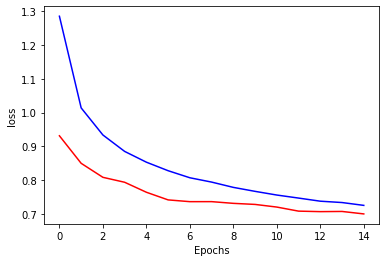

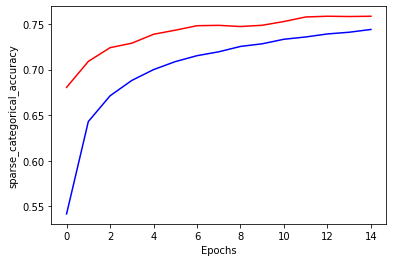

---> Pas mal, on arrive à des scores tout à fait honorables ! 